# Image Generation via Variational Autoencoder (VAE) 

In [1]:
import os
from pyexpat import model
import torch
from torchvision import transforms
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torch import nn
import matplotlib.pyplot as plt
import statistics
import numpy as np
from torchvision.utils import make_grid 
from torchvision.utils import save_image

In [2]:
from MyDataset import MyDataset
from MyEval import MyEval
from MyModel import MyVariationalEncoder
from MyResult import MyResult
from MyTrain import MyTrain
from MySample import MySample

## construct dataset for training

In [3]:
dataset = MyDataset(path='data', split='train')
print(f'number of data = {len(dataset)}')

number of data = 100


## construct dataloader

In [4]:
batch_size = 100
dataloader = DataLoader(dataset, batch_size=batch_size, drop_last=True, shuffle=True)

## plot the dataset

In [5]:
iter_data   = iter(dataloader)
image       = next(iter_data)
dim_channel = image.size(1)
dim_height  = image.size(2)
dim_width   = image.size(3)
print(f'image : (shape) = {image.shape}')
print(f'image : (dtype) = {image.dtype}')
print(f'image : (min) = {image.min()}, (max) = {image.max()}')
print(f'dim_channel = {dim_channel}, dim_height = {dim_height}, dim_width = {dim_width}')

image : (shape) = torch.Size([100, 1, 32, 32])
image : (dtype) = torch.float32
image : (min) = 0.0, (max) = 1.0
dim_channel = 1, dim_height = 32, dim_width = 32


## plot the training images

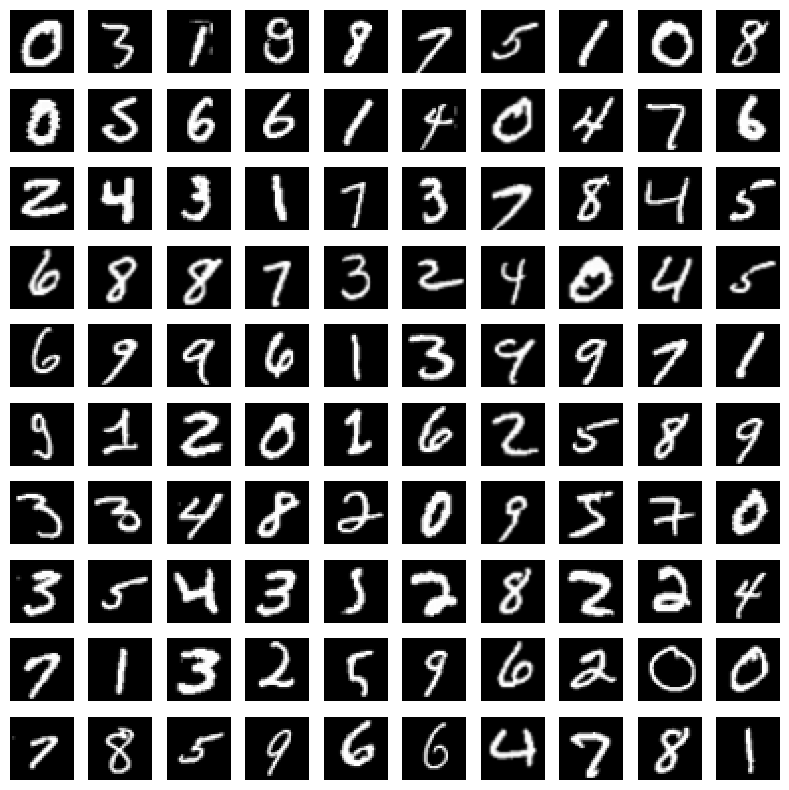

In [6]:
nRow = 10
nCol = 10
plt.figure(figsize=(8, 8))
for i in range(nRow):
    for j in range(nCol):
        idx = nCol * i + j
        plt.subplot(nRow, nCol, idx+1)
        plt.axis('off')
        plt.imshow(image[idx].squeeze(0), cmap='gray')
plt.tight_layout()
plt.show()

## construct model

In [7]:
vae = MyVariationalEncoder()

## train

In [8]:
trainer = MyTrain(vae)
trainer.train(dataset)

Epoch [1/10000] Loss: 567.6740
Epoch [2/10000] Loss: 410.2598
Epoch [3/10000] Loss: 346.5282
Epoch [4/10000] Loss: 291.2731
Epoch [5/10000] Loss: 280.9461
Epoch [6/10000] Loss: 329.4948
Epoch [7/10000] Loss: 265.6317
Epoch [8/10000] Loss: 303.5035
Epoch [9/10000] Loss: 281.3138
Epoch [10/10000] Loss: 266.8122
Epoch [11/10000] Loss: 244.6825
Epoch [12/10000] Loss: 225.6638
Epoch [13/10000] Loss: 312.4643
Epoch [14/10000] Loss: 231.8330
Epoch [15/10000] Loss: 274.6547
Epoch [16/10000] Loss: 223.2866
Epoch [17/10000] Loss: 194.7153
Epoch [18/10000] Loss: 240.8648
Epoch [19/10000] Loss: 270.4049
Epoch [20/10000] Loss: 236.3948
Epoch [21/10000] Loss: 187.7906
Epoch [22/10000] Loss: 239.8279
Epoch [23/10000] Loss: 195.5421
Epoch [24/10000] Loss: 279.0563
Epoch [25/10000] Loss: 270.1300
Epoch [26/10000] Loss: 264.0145
Epoch [27/10000] Loss: 235.4775
Epoch [28/10000] Loss: 271.3782
Epoch [29/10000] Loss: 245.7920
Epoch [30/10000] Loss: 243.6379
Epoch [31/10000] Loss: 326.6797
Epoch [32/10000] 

## plot losses 

Text(0, 0.5, 'loss')

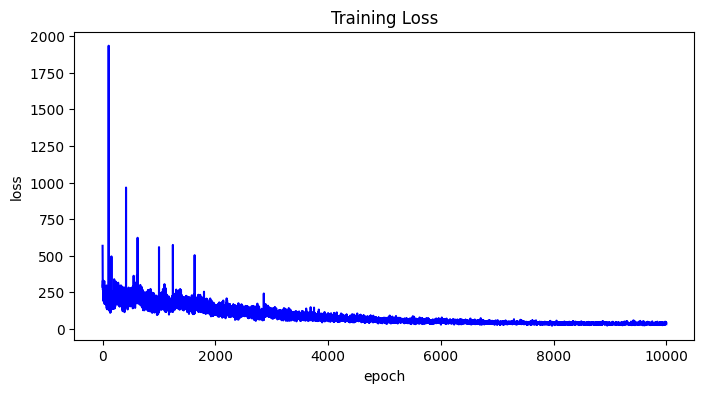

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(trainer.loss_epoch, '-', color='blue')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.ylabel('loss')


## save the trained models

In [10]:
torch.save(vae.encoder.state_dict(), 'encoder.pth')
torch.save(vae.latent.state_dict(), 'latent.pth')
torch.save(vae.decoder.state_dict(), 'decoder.pth')

## load models

In [11]:
vae                 = MyVariationalEncoder()
state_dict_encoder  = torch.load('encoder.pth', map_location=torch.device('cpu'))
state_dict_latent   = torch.load('latent.pth', map_location=torch.device('cpu'))
state_dict_decoder  = torch.load('decoder.pth', map_location=torch.device('cpu'))
vae.encoder.load_state_dict(state_dict_encoder)
vae.latent.load_state_dict(state_dict_latent)
vae.decoder.load_state_dict(state_dict_decoder)

<All keys matched successfully>

## generate samples

In [12]:
sampler     = MySample(vae)
num_sample  = 100
batch_size  = 10
num_batch   = num_sample // batch_size
list_sample = []

for i in range(num_batch):
    sample = sampler.sample(batch_size)
    list_sample.append(sample)
    
samples = torch.cat(list_sample, dim=0)

## save samples

In [13]:
num_sample  = samples.size(0)
dir_save    = os.path.join('data', 'sample')
os.makedirs(dir_save, exist_ok=True)

for i in range(num_sample):
    save_image(samples[i], os.path.join(dir_save, f'{i:03d}.png'))

## plot samples

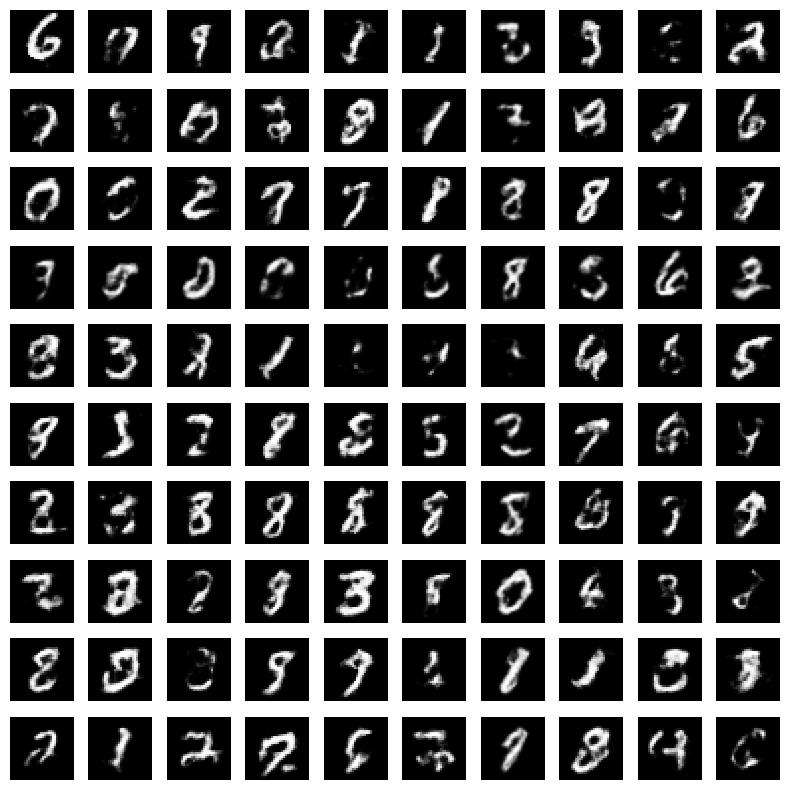

In [14]:
nRow = 10
nCol = 10
plt.figure(figsize=(8, 8))
for i in range(nRow):
    for j in range(nCol):
        idx = nCol * i + j
        plt.subplot(nRow, nCol, idx+1)
        plt.axis('off')
        plt.imshow(samples[idx].squeeze(0), cmap='gray')
plt.tight_layout()
plt.show()

## evaluation

In [15]:
eval    = MyEval(metric='fid')
fid     = eval.compute()
print(f'==================================================')
print(f'fid = {fid}')
print(f'==================================================')

update real dataset...
update fake dataset...
fid = 123.43001556396484


## save results

In [16]:
result = MyResult()
result.add_result('fid', fid)
result.add_result('loss_epoch', trainer.loss_epoch)
result.save()

## test training function

In [17]:
dataset = MyDataset(path='data', split='train')
vae     = MyVariationalEncoder()
trainer = MyTrain(vae)
trainer.num_epoch = 10
trainer.train(dataset)

Epoch [1/10] Loss: 436.9080
Epoch [2/10] Loss: 337.7243
Epoch [3/10] Loss: 334.9492
Epoch [4/10] Loss: 260.8289
Epoch [5/10] Loss: 263.3702
Epoch [6/10] Loss: 262.3829
Epoch [7/10] Loss: 344.8766
Epoch [8/10] Loss: 247.8892
Epoch [9/10] Loss: 220.9839
Epoch [10/10] Loss: 268.5387


Text(0, 0.5, 'loss')

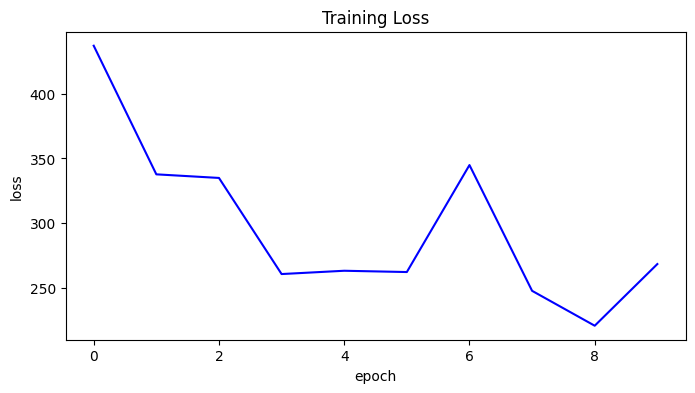

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(trainer.loss_epoch, '-', color='blue')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.ylabel('loss')